<a href="https://colab.research.google.com/github/gustavovazquez/ML/blob/main/NLP_word_vectors_spacy_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>NLP Tutorial: Text Classification Using Spacy Word Embeddings</h3>

#### Planteamiento del Problema

* Las noticias falsas hacen referencia a la desinformación o información errónea que circula en un país, propagándose tanto de forma oral como, más recientemente, a través de medios digitales como mensajes de WhatsApp, publicaciones en redes sociales, entre otros.

* Este tipo de noticias se difunden con mayor rapidez que las noticias verídicas, generando confusión, temor y conflictos tanto en determinados grupos como en la sociedad en general.

* En este trabajo se abordará esta problemática utilizando técnicas clásicas de procesamiento de lenguaje natural (NLP, por sus siglas en inglés), con el objetivo de clasificar si un mensaje o texto dado corresponde a una **noticia real o falsa**.

* Para ello, se emplearán **embeddings GloVe** disponibles en SpaCy, entrenados sobre un corpus masivo de Wikipedia, con el fin de realizar el preprocesamiento y vectorización del texto, aplicando posteriormente distintos algoritmos de clasificación.

---

#### Conjunto de Datos

Créditos: [https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

* El conjunto de datos consta de dos columnas:

  * `Text`: contiene las declaraciones o mensajes relativos a un determinado evento o situación.
  * `Label`: indica si el texto correspondiente es falso o verdadero.

* Dado que existen únicamente dos clases posibles, este problema se encuadra dentro del ámbito de la **clasificación binaria**.


In [1]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/gustavovazquez/datasets/refs/heads/main/Fake_Real_Data.csv", on_bad_lines='skip')

print(df.shape)

df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
# chequear la distribución de las etiquetas
df['label'].value_counts()

,count
label,
Fake,5000
Real,4900


A partir del análisis anterior, se observa que las etiquetas aparecen aproximadamente la misma cantidad de veces, lo que indica que el conjunto de datos está balanceado.

In [4]:
# Mapeamos las etiquetas Fake y Real a 0 y 1
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


Obtener los vectores de palabras de SpaCy y almacenarlos en un DataFrame de pandas.

In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [6]:
# leeeeento
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [7]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [9]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [11]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [12]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



**Confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

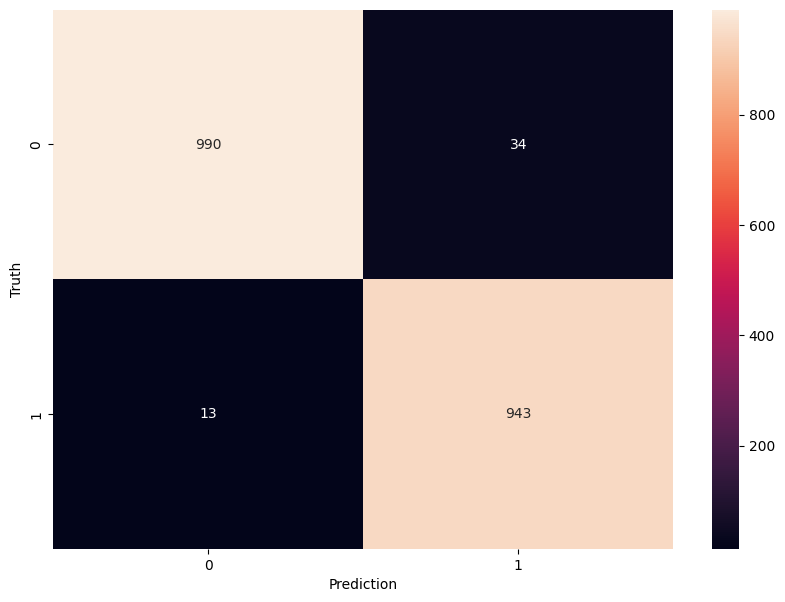

In [13]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Key Takeaways

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very **high dimensional vector space**, performed really well with glove vectors due to only **300-dimensional** vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are **negative values**. So, to overcome this shortcoming, we have used the **Min-Max scaler** to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.